_Behavior of the Maximum Likelihood in Quantum State Tomography_ - Supplemental Notebook I
================================

Travis Scholten and Robin Blume-Kohout, _Sandia National Labs_ and the _Center for Quantum Information and Control, University of New Mexico_

The purpose of this notebook is to reproduce some of the figures from our paper, available on the [arXiv](https://arxiv.org/abs/1609.04385).

This notebook requires installing ``Python``, ``matplotlib``, ``numpy``, ``pandas``, and ``seaborn``. If you don't want to install seaborn, then that's OK - the color schemes and formatting will just look a little bit different!

If you've arrived at this notebook by cloning the [GitHub repository for this paper](https://github.com/Travis-S/2016_MaxLik_Tomography), the data files referenced are located in the `Data` directory.

Preamble
=========

Some housekeeping items.

In [9]:
from __future__ import division

import numpy as np

#For plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.cm as cm
#Make the figures render in the notebook itself
%matplotlib inline

#Special imports
import pandas as pd
import scipy.stats as st

try:
    import seaborn as sns

    #seaborn settings to make the plots look nice
    sns.set(style='darkgrid', font_scale=2.5)
except Exception:
    print('seaborn not installed. Falling back to matplotlib formatting and colors')
    pass

#Change "False" -> "True" to have matplotlib render
#the text in the plots with a LaTeX-like font
mpl.rc('text', usetex=True)
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

#Set to "True" to save the images in the ``Images" directory
save = True

In [4]:
#A convenient way of storing a representation of the true states
#we considered
idDict = {'d2s0': r'\vert 0\rangle\langle 0|', 'd2s2': r'|+\rangle\langle +|',\
         'd5s0' : r'1\!\mathrm{l}_{5}/5', 'd3s2': r'.65|1\rangle\langle 1| + .35|2\rangle\langle 2|',\
         'd2s3': r'1\!\mathrm{l}_{2}/2'}

Figure 1
===========

In [5]:
def in_outs(coords, kind='quantum'):
    if kind == 'quantum':
        ins = [K for K in coords if K[0] ** 2 + K[1] ** 2 <= 1]
        outs = [K for K in coords if K[0] ** 2 + K[1] ** 2 > 1]
    elif kind == 'classical':
        #Coords is (Z, X) which is confusing...
        #So we swap them here, and subtract off 1
        temp = [(k[1], k[0] - 1) for k in coords]

        #Compute the angle the points make with respect to the X axis
        angles = np.array(map(lambda k: np.arctan2(k[1], k[0]) * 180 / np.pi, temp))

        #
        ins_indices =np.where((-120 <= angles) & (angles <= -60))[0]
        ins = np.array(temp)[ins_indices]

        outs_indices = [k for k in xrange(len(temp)) if k not in ins_indices]
        outs = np.array(temp)[outs_indices]
    
    ins = [x for x in ins if x[1] > -.35]
    return outs, ins

#Generate the random estimates
np.random.seed(0)
ests = np.random.multivariate_normal(mean=[1, 0], cov=.01 * np.eye(2), size=150)

Z = np.matrix([[1, 0], [0, -1]])
X = np.matrix([[0, 1], [1, 0]])
coords = [(float(np.real(np.trace(np.dot(Z, K)))), float(np.real(np.trace(np.dot(X, K))))) for K in ests]

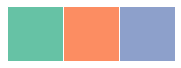

In [6]:
try:    
    colors = sns.color_palette("Set2", 3)
    sns.palplot(colors)
except Exception:    
    colors = ['green', 'orange', 'blue']

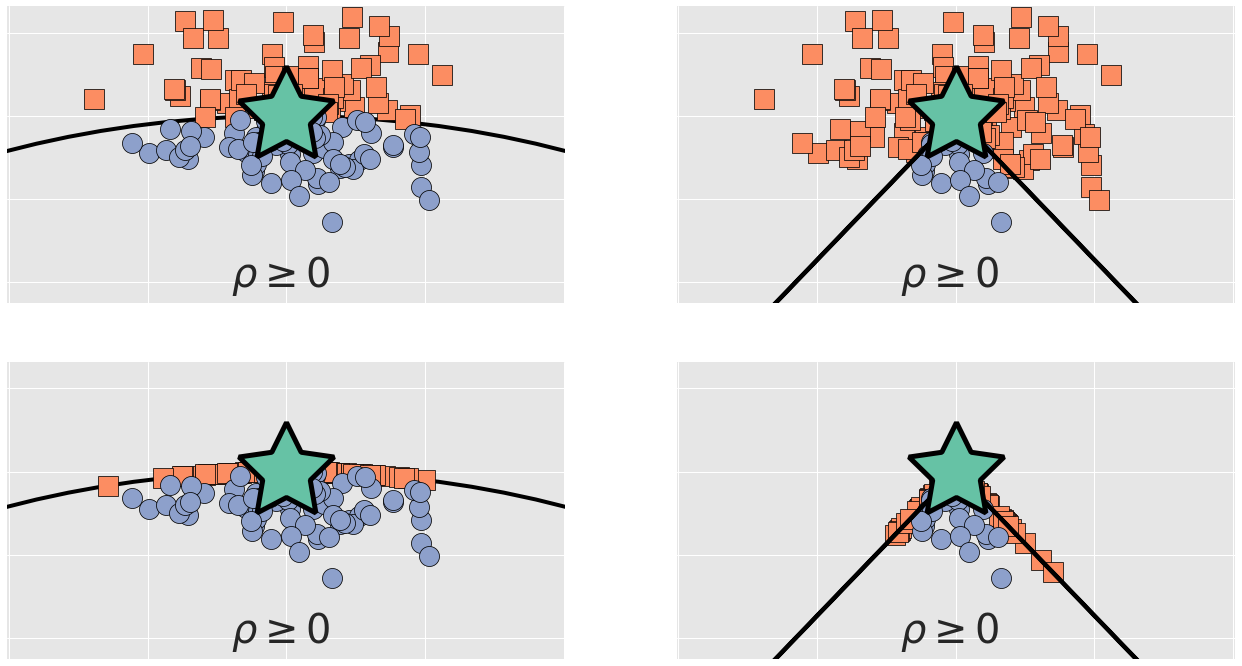

In [7]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig = plt.figure(figsize=(22, 12))

#GLOBAL PROPERTIES
markeredgewidth = .75

#TOP LEFT FIGURE
ax1 = plt.subplot2grid((2,2), (0,0), colspan=1)

#Plot the points, separated by whether they are
#insides/outside the boundary
outs, ins = in_outs(coords, kind='quantum')
counter = 1
d = {0: [outs, 's'], 1: [ins, 'o']}
for k in d.keys():
    Z = [q[0] for q in d[k][0]]
    X = [q[1] for q in d[k][0]]

    ax1.plot(X, Z, ls='', marker=d[k][1], clip_on=False, markersize=20, color=colors[counter],\
            markeredgecolor='black',mew=markeredgewidth)
    counter += 1
    
#Draw the truth
ax1.plot(0, 1, marker=(5,1), color=colors[0], markersize=100, zorder=10, lw=4, mec='black', mew=5)

#Draw the boundary circle
circle = plt.Circle((0, 0), 1, fill=True, lw=4, clip_on=True, color='grey', alpha=.5)
plt.gca().add_patch(circle)

#TOP RIGHT FIGURE
ax2 = plt.subplot2grid((2,2), (0,1), colspan=1)
outs, ins = in_outs(coords, kind='classical')
counter = 1
d = {0: [outs, 's'], 1: [ins, 'o']}
for k in d.keys():
    X = [q[0] for q in d[k][0]]
    Z = [q[1] + 1 for q in d[k][0]]
    ax2.plot(X, Z, ls='', marker=d[k][1], clip_on=False, markersize=20, color=colors[counter],\
                        markeredgecolor='black',mew=markeredgewidth)
    counter += 1

#Plot the truth
ax2.plot(0, 1, marker=(5,1), color=colors[0], markersize=100, zorder=10, lw=4, mec='black', mew=5)


#BOTTOM LEFT FIGURE
ax3 = plt.subplot2grid((2,2), (1,0), colspan=1)

#Plot the points, separated by whether they are
#insides/outside the boundary
outs, ins = in_outs(coords, kind='quantum')
outs = np.array(outs) / np.linalg.norm(outs)
counter = 2
d = {0: [outs, 's'], 1: [ins, 'o']}
for k in d.keys():

    if k == 0:
        Z = [q[0]/np.linalg.norm(q) for q in d[k][0]]
        X = [q[1]/np.linalg.norm(q) for q in d[k][0]]    
    else:
        Z = [q[0] for q in d[k][0]]
        X = [q[1] for q in d[k][0]]
    
    ax3.plot(X, Z, ls='', marker=d[k][1], clip_on=False, markersize=20, color=colors[counter],\
            markeredgecolor='black',mew=markeredgewidth)
    
#Draw the truth
ax3.plot(0, 1, marker=(5,1), color=colors[0], markersize=100, zorder=10, lw=4, mec='black', mew=5)

#Draw the boundary circle
circle = plt.Circle((0, 0), 1, fill=True, lw=4, clip_on=True, color='grey', alpha=.5)
plt.gca().add_patch(circle)

#BOTTOM LEFT FIGURE
ax3 = plt.subplot2grid((2,2), (1,0), colspan=1)

#Plot the points, separated by whether they are
#insides/outside the boundary
outs, ins = in_outs(coords, kind='quantum')
counter = 1
d = {0: [outs, 's'], 1: [ins, 'o']}
for k in d.keys():

    if k == 0:
        Z = [q[0]/np.linalg.norm(q) for q in d[k][0]]
        X = [q[1]/np.linalg.norm(q) for q in d[k][0]]    
    else:
        Z = [q[0] for q in d[k][0]]
        X = [q[1] for q in d[k][0]]
    
    ax3.plot(X, Z, ls='', marker=d[k][1], clip_on=False, markersize=20, color=colors[counter],\
            markeredgecolor='black',mew=markeredgewidth)
    counter += 1
#Draw the truth
ax3.plot(0, 1, marker=(5,1), color=colors[0], markersize=100, zorder=10, lw=4, mec='black', mew=5)

#Draw the boundary circle
circle = plt.Circle((0, 0), 1, fill=True, lw=4, clip_on=True, color='grey', alpha=.5)
plt.gca().add_patch(circle)


#BOTTOM RIGHT FIGURE
ax4 = plt.subplot2grid((2,2), (1,1), colspan=1)
outs, ins = in_outs(coords, kind='classical')

d = {0: [outs, 's'], 1: [ins, 'o']}
for k in d.keys():
    X = [q[0] for q in d[k][0]]
    Z = [q[1] + 1 for q in d[k][0]]
    
    if k == 1:        
        X = [q[0] for q in d[k][0]]
        Z = [q[1] + 1 for q in d[k][0]]  
        ax4.plot(X, Z, ls='', marker=d[k][1], clip_on=False, markersize=20, color=colors[2],\
                        markeredgecolor='black',mew=markeredgewidth)
    elif k == 0:
        #Compute the angle the points make with respect to the X axis
        angles = np.array(map(lambda K: np.arctan2(K[1], K[0]) * 180 / np.pi, d[k][0]))
        
        ixs = np.where((angles <= 30) & (angles >= -60))[0]
        
        pts = d[k][0][ixs]
        
        v = np.array([1, -1 * np.tan(60 * np.pi / 180)])
        vhat = v / np.linalg.norm(v)
        ax4.plot(vhat[0], vhat[1], marker='o', markersize=10)
        pts = [np.dot(K,vhat)*vhat for K in pts]
        
        X = [q[0] for q in pts]
        Z = [q[1] + 1 for q in pts]      
                
        ax4.plot(X, Z, ls='', marker=d[k][1], clip_on=False, markersize=20, color=colors[1],\
                        markeredgecolor='black',mew=markeredgewidth)
        

        ixs = np.where((angles <= -120) & (angles >=-210))[0]
        
        pts = d[k][0][ixs]
        
        v = np.array([-1, -1 * np.tan(60 * np.pi / 180)])
        vhat = v / np.linalg.norm(v)
        ax4.plot(vhat[0], vhat[1], marker='o', markersize=10)
        pts = [np.dot(K,vhat)*vhat for K in pts]
        
        X = [q[0] for q in pts]
        Z = [q[1] + 1 for q in pts]      
                
        ax4.plot(X, Z, ls='', marker=d[k][1], clip_on=False, markersize=20, color=colors[1],\
                        markeredgecolor='black',mew=markeredgewidth)

#Plot the truth
ax4.plot(0, 1, marker=(5,1), color=colors[0], markersize=100, zorder=10, lw=4, mec='black', mew=5)

#Draw the simplex boundaries - ax2 and ax4
dx = .3
kwargs = {'head_width' : None,  'lw':4, 'zorder':0, 'color':'grey', 'alpha':.5}
for a in [ax2, ax4]:
    a.arrow(0, 1, dx, -dx * np.tan(60 * np.pi / 180), **kwargs)
    a.arrow(0, 1, -dx, -dx * np.tan(60 * np.pi / 180), **kwargs)

#Fill in the simplex - ax2 and ax4
for a in [ax2, ax4]:
    x = np.linspace(0, max(a.get_xlim()))
    y = -x*np.tan(60 * np.pi / 180) + 1
    a.fill_between(x, y, color='grey', alpha=.5)

    x = np.linspace(min(a.get_xlim()), 0)
    y = x*np.tan(60 * np.pi / 180) + 1
    a.fill_between(x, y, color='grey', alpha=.5)

#Turn off all x,y labels and add rho >= 0
for a in [ax1, ax2, ax3, ax4]:
    a.text(-.06, .59, r'$\rho \geq 0$', fontsize=40)
    a.set_xticklabels([])
    a.set_yticklabels([])

#Adjust limits for ax1 and ax2 (top row)
for a in [ax1, ax2]:
    l = min(a.get_xlim())#- .1
    a.set_xlim([l, -l])
    a.set_ylim([.55, max(a.get_ylim())])

#Force the bottom two rows to use the same
#limits as the top
ax3.set_ylim(.55, max(ax1.get_ylim()))
ax3.set_xlim(ax1.get_xlim())

ax4.set_ylim([.55, max(ax2.get_ylim())])
ax4.set_xlim(ax2.get_xlim())
    
if save: fig.savefig('Images/Figure_1.pdf', format='pdf', bbox_inches='tight')

fig.subplots_adjust(hspace=0.1, wspace=0.05)
plt.show()
sns.set_style("darkgrid")

Figure 2
===========

In [8]:
df = pd.read_csv('Data/iso_quantum_llrs_sim_totals.csv')
df1 = pd.read_csv('Data/iso_quantum_models.csv')
df = df.merge(df1, on=['dimRec', 'rankTrue'], how='inner')
df = df[df['dimRec'] <= 30]
ranks = df['rankTrue'].unique()

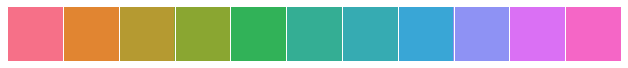

In [9]:
try:
    colors2 = sns.color_palette('husl', n_colors=len(ranks) + 1)
    sns.palplot(colors2)
    
except Exception:
    colors2 = cm.viridis(np.linspace(0, 1, len(ranks) + 1))

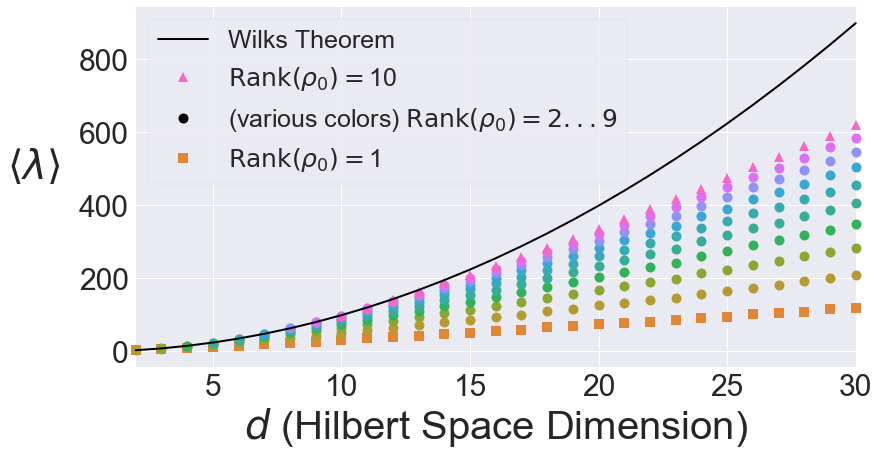

In [10]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])

counter  = 1

for r in ranks:
    X = df[df['rankTrue'] == r]['dimRec'].values
    Y = df[df['rankTrue'] == r]['llrs'].values
    if r in [min(ranks), max(ranks)]:
        label = r'$\mathrm{Rank}(\rho_{0})=$'+ '{0}'.format(r)
    else:
        label = ''
    
    if r == 1:
        marker = 's'
    elif r == 10:
        marker = '^'
    else:
        marker = 'o'
        
    ax.plot(X, Y, clip_on=False, ls='', color=colors2[counter],\
            marker=marker, markersize=10, label=label , alpha=1)
    counter += 1
    
X = df[df['rankTrue'] == 1]['dimRec'].values
Y = df[df['rankTrue'] == 1]['Wilks_Theorem'].values

ax.plot(X, Y, ls='-', marker='', lw=2, clip_on=False,\
        color='black', label='Wilks Theorem')

temp = ax.plot([], [], ls='', color='black', marker='o',
                          markersize=10, label=r'(various colors) $\mathrm{Rank}(\rho_{0}) = 2...9$')

handles, labels = ax.get_legend_handles_labels()
ix = [2, 1, 3, 0]
handles = list(np.array(handles)[ix])
labels = list(np.array(labels)[ix])

ax.legend(loc=0, fontsize=25, frameon=True, fancybox=True, handles=handles, labels=labels)

ax.set_xlabel(r'$d$ (Hilbert Space Dimension)', fontsize=40)
ax.set_ylabel(r'$\langle \lambda\rangle$', fontsize=40, rotation=0, labelpad=45)
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=30)
ax.set_xlim([2, 30])


if save: fig.savefig('Images/Figure_2.pdf', format='pdf', bbox_inches='tight')

plt.show()

Figure 3
==========

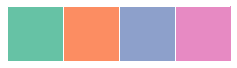

In [11]:
try:    
    colors = sns.color_palette("Set2", 4)
    sns.palplot(colors)
except Exception:    
    colors = ['green', 'orange', 'blue', 'pink']

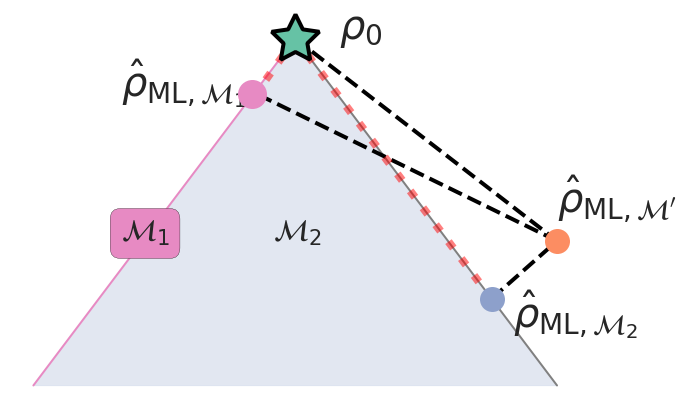

In [12]:
sns.set_style("white")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

X = np.linspace(-.6, 0, num=100)
Y = -np.abs(X)
ax.plot(X, Y, color=colors[3], lw=2)

X = np.linspace(0, .6, num=100)
Y = -np.abs(X)
ax.plot(X, Y, color='grey', lw=2)

X = np.linspace(-.6, .6, num=100)
Y = -np.abs(X)
ax.fill_between(X, Y, -.6, alpha=.25, zorder=0, color=colors[2])

star_d = {'color': colors[0], 'marker': (5, 1), 'markersize': 50, 'zorder': 10, 'mec' : 'black', 'mew' : 4}
ax.plot(0, 0,  **star_d)

#unconstrained MLE
ax.plot(.6, -.35, marker='o', markersize=25, color=colors[1], zorder=10)

#MLE in larger model
ax.plot(.45, -.45, marker='o', markersize=25, color=colors[2], zorder=10)

#MLE in smaller model
ax.plot(-.1, -.095, marker='o', markersize=25, color=colors[3], mew=4, zorder=10)

#Between larger model and unconstrained
ax.plot([.45, .6], [-.45, -.35], marker='', ls='--', lw=4, color='black')

#Between smaller model and unconstrained
ax.plot([.6, -.09], [-.35, -.095], marker='', ls='--', lw=4, color='black')

#Between rho0 and smaller
ax.plot([0, -.09], [0, -.095], marker='', ls=':', lw=8, color='red', alpha=.5)

#Between rho0 and larger
ax.plot([0, .45], [0, -.45], marker='', ls=':', lw=8, color='red', alpha=.5)

#Between rho0 and unconstrained
ax.plot([0, .6], [0, -.35], marker='', ls='--', lw=4, color='black')

#Between smaller and larger
#ax.plot([-.1, .45], [-.095, -.45], marker='', ls='--', lw=4, color='red', alpha=.5)


#Labelling things
ax.text(.1, 0, r'$\rho_{0}$', fontsize=40)

#rhoML_1
m = '{\mathrm{ML}, \mathcal{M}_{1}}'
s = r'$\hat{0}_{1}$'.format(r'\rho', m)
ax.text(-.4, -.1, s, fontsize=40)

#rhoML_2
m = '{\mathrm{ML}, \mathcal{M}_{2}}'
s = r'$\hat{0}_{1}$'.format(r'\rho', m)
ax.text(.5, -.5, s, fontsize=40)

#rhoML_M'
m = '{\mathrm{ML}, \mathcal{M}\'}'
s = r'$\hat{0}_{1}$'.format(r'\rho', m)
ax.text(.6, -.3, s, fontsize=40)

#Label the two models
ax.text(-.4, -.35, r'$\mathcal{M}_{1}$', bbox=dict(boxstyle='round', facecolor=colors[3], pad=.35))
ax.text(-.05, -.35, r'$\mathcal{M}_{2}$')#, bbox=dict(boxstyle='round', facecolor='wheat'))


ax.set_ylim([min(ax.get_ylim()), max(ax.get_ylim()) + .025])
ax.set_frame_on(False)

ax.set_xticklabels([])
ax.set_yticklabels([])

if save: fig.savefig('Images/Figure_3.pdf', format='pdf', bbox_inches='tight')

plt.show()

sns.set_style("darkgrid")

Figure 4
==========

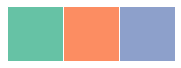

In [13]:
try:    
    colors = sns.color_palette("Set2", 3)
    sns.palplot(colors)
except Exception:    
    colors = ['green', 'orange', 'blue']

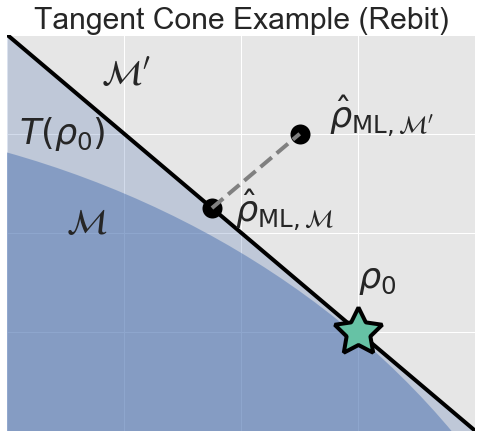

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig = plt.figure(figsize=(6.5, 5.5))

star_d = {'color': colors[0], 'marker': (5, 1), 'markersize': 50, 'zorder': 10, 'mec' : 'black', 'mew' : 4}

ax1 = fig.add_axes([0,0,1,1])

ax1.plot(0, 0, **star_d)

#Tangent plane
X = np.linspace(-.3, .3)

ax1.fill_between(X, -X, -X-1, lw=4, alpha=.25)
ax1.plot(X, -X, ls='-', lw=4, color='black')

#State space
arc = patches.Circle([-.54, -.54], radius=.76, lw=4, fill=True, alpha=.5, ls='-')
ax1.add_patch(arc)

#rhoML(M')
coord = np.array([-.05, 0.2])
ax1.plot(coord[0], coord[1], marker='o', markersize=20, color='black')

#rhoML(M)
unit = 1/np.sqrt(2)*np.array([1, -1])

projection = np.dot(unit, coord)*unit

ax1.plot(projection[0], projection[1], marker='o', markersize=20, color='black')

ax1.plot([projection[0], coord[0]], [projection[1], coord[1]], ls='--', lw=4, color='grey')

ax1.set_title('Tangent Cone Example (Rebit)', fontsize=30)

ax1.text(0, .045, r'$\rho_{0}$', fontsize=35)
s = '{\mathrm{ML}, \mathcal{M}}'
ax1.text(projection[0] + .02, projection[1] - .015, r'$\hat{1}_{0}$'.format(s, r'\rho'),fontsize=35)

ax1.text(-.29, .19, r'$T(\rho_{0})$', fontsize=35)
ax1.text(-.25, .1, r'$\mathcal{M}$', fontsize=35)

s = '$\mathcal{M}\'$'
ax1.text(-.22, .25, s, fontsize=35)

m = '{\mathrm{ML}, \mathcal{M}\'}'
s = r'$\hat{0}_{1}$'.format(r'\rho', m)
ax1.text(coord[0]+.025, coord[1] + .005, s, fontsize=35)
ax1.set_xlim([-.3, .1])
ax1.set_ylim([-.1, .3])
ax1.set_xticklabels([])
ax1.set_yticklabels([])

if save: fig.savefig('Images/Figure_4.pdf', format='pdf', bbox_inches='tight')

plt.show()
sns.set_style('darkgrid')

Figure 5
==========

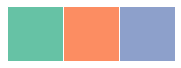

In [15]:
try:    
    colors = sns.color_palette("Set2", 3)
    sns.palplot(colors)
except Exception:    
    colors = ['green', 'orange', 'blue']

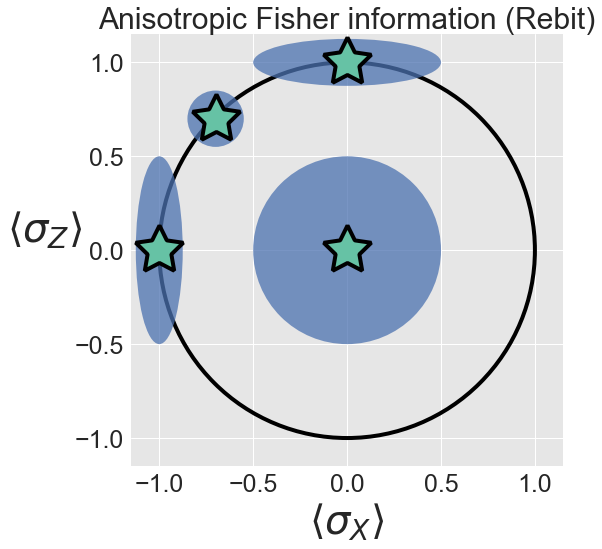

In [16]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig = plt.figure(figsize=(5, 5))

star_d = {'color': colors[0], 'marker': (5, 1), 'markersize': 50, 'zorder': 10, 'mec' : 'black', 'mew' : 4}
ellipse_d = {'fill' : True, 'alpha' : .75}
ax1 = fig.add_axes([0,0,1,1])

circle = plt.Circle((0, 0), 1, fill=False, lw=4, clip_on=True, color='black')
ax1.add_patch(circle)

ax1.plot(0, 1, **star_d)

ellipse = patches.Ellipse((0, 1), 1, .25, **ellipse_d)
ax1.add_patch(ellipse)

ax1.plot(0, 0,  **star_d)

ellipse = patches.Ellipse((0, 0), 1, 1, **ellipse_d)
ax1.add_patch(ellipse)

ax1.plot(-1, 0, **star_d)

ellipse = patches.Ellipse((-1, 0), .25, 1, **ellipse_d)
ax1.add_patch(ellipse)

ax1.plot(-.7, .7, **star_d)

ellipse = patches.Ellipse((-.7, .7), .3, .3, **ellipse_d)
ax1.add_patch(ellipse)


ax1.set_xticks(ax1.get_yticks())

ax1.set_xlim([-1.15, 1.15])
ax1.set_ylim([-1.15, 1.15])

ax1.set_xlabel(r'$\langle\sigma_{X}\rangle$', fontsize=30)
ax1.set_ylabel(r'$\langle\sigma_{Z}\rangle$', fontsize=30, labelpad=5)
ax1.set_title('Anisotropic Fisher information (Rebit)', fontsize=20)

if save: fig.savefig('Images/Figure_5.pdf', format='pdf', bbox_inches='tight')

plt.show()
sns.set_style("darkgrid")

Figure 6
============

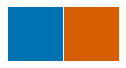

In [17]:
try:
    colors= sns.color_palette('colorblind', n_colors=3)
    colors = [colors[0], colors[2]]
    sns.palplot(colors)
except Exception:
    colors = cm.coolwarm(np.linspace(0, 1, 2))

In [18]:
def draw_kite(ax, label=False, fontsize=80):
    params = [[(2, 0), 6, 5.95], [(0, 7), 1, 1], [(1, 6), 1, 1]]
    
    for p in params:
        ax.add_patch(
        patches.Rectangle(p[0], p[1], p[2],
        fill=False,
        edgecolor=colors[1],
        linewidth=10,
        clip_on=False
        )
        )

    if label:
        ax.text(4, 4, '``Kite"', fontsize=fontsize, fontdict={'color': 'white'},\
            bbox=dict({'facecolor': colors[1], 'alpha':1}))
        
        
def draw_L(fig, label=False, fontsize=80):
    #Upper Right L
    coordsU = [[(2.1, 8), (6.025, 6.025)], [(8, 8), (6.03, 8)], [(1.07, 8), (8, 8)],\
         [(1.07, 2.08), (7.09, 7.09)], [(1.07, 1.07), (7.09, 8)],\
           [(2.08, 2.08), (6.03, 7.09)]]

    #Lower Left L
    coordsL = [[(0, 0), (0, 6.9)], [(1.93, 1.93), (0, 5.93)], [(0, 1.93), (0, 0)],\
           [(0, .94), (6.92, 6.92)],\
             [(.95, 1.89), (5.93, 5.93)], [(.94, .94), (5.93, 6.92)]]
    
    coordsU.extend(coordsL)
    for c in coordsU:
        line = plt.Line2D(c[0], c[1], lw=10, color=colors[0], clip_on=False)
        fig.gca().add_line(line)
    
    if label:
        ax.text(.5, 4, '``L"', fontsize=fontsize, fontdict={'color': 'white'},\
            bbox=dict({'facecolor': colors[0], 'alpha':1}))
        
        ax.text(4.5, 6.75, '``L"', fontsize=fontsize, fontdict={'color': 'white'},\
            bbox=dict({'facecolor': colors[0], 'alpha':1})) 

In [19]:
#Creates the state
df = pd.read_csv('Data/states.csv')
M = df[df['stateID'] == 'd2s3'].values[0][1:]
M = [np.abs(np.complex(x)) for x in M]
M = np.matrix(M).reshape((5, 5))
N = np.zeros_like(np.eye(8))
for j in xrange(len(M)):
    for k in xrange(len(M)):
        N[j, k] = M[j,k]

In [20]:
df = pd.read_csv('Data/iso_quantum_llrs_sim_contribs.csv')
M = np.matrix(df[df['stateID'] == 'd2s3'].values[0][2:], dtype=float)
M = M.reshape((8, 8))

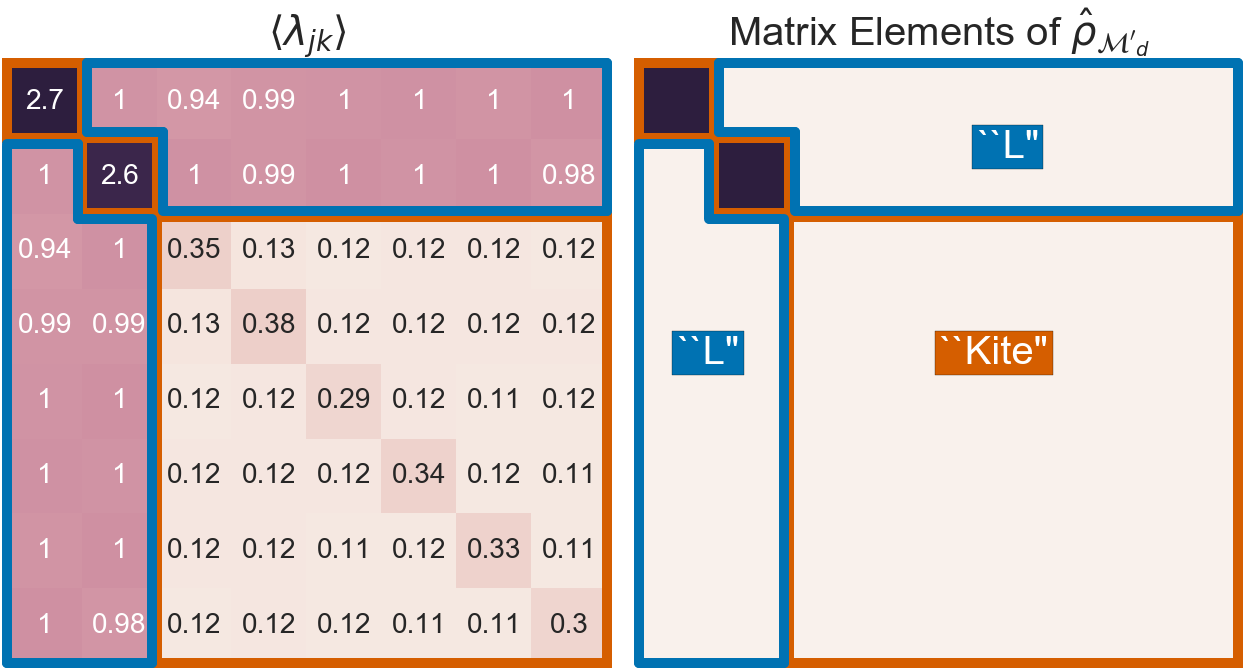

In [21]:
fig = plt.figure(figsize=(18, 10))

ax = plt.subplot2grid((1,2), (0,1), colspan=1)
try:
    sns.heatmap(N, ax=ax, annot=False, annot_kws={'fontsize': 35}, cbar=False)
except Exception:
    ax.pcolor(np.flipud(N), cmap=cm.Blues)

draw_kite(ax, label=True, fontsize=40)        
draw_L(fig, label=True, fontsize=40)

m = '{\mathcal{M}\'_{d}}'
s = r'$\hat{0}_{1}$'.format(r'\rho', m)
ax.set_title(r'Matrix Elements of ' + s, fontsize=40, y=1.02)

ax2 = plt.subplot2grid((1,2), (0,0), colspan=1)
try:
    sns.heatmap(M, ax=ax2, annot=True, annot_kws={'fontsize': 28}, vmin=0, cbar=False)
except Exception:
    ax2.pcolor(np.array(np.flipud(M)), cmap=cm.Blues)
draw_kite(ax2)
draw_L(fig)

ax2.set_title(r'$\langle \lambda_{jk}\rangle$', fontsize=40, y=1.02)
for a in [ax, ax2]:
    a.set_yticklabels([])
    a.set_xticklabels([])

fig.tight_layout()
if save: fig.savefig('Images/Figure_6.pdf', format='pdf', bbox_inches='tight')
        
plt.show()


Figure 7
==========

In [22]:
def NormalRandomArray( n ):
    return np.array( [np.random.normal(0,1,n) for k in range(n)] )
def NormalHermitianRandomArray(n):
    temp = NormalRandomArray(n) + complex(0,1)*NormalRandomArray(n)
    return (temp + np.matrix(temp).H)*0.5

def GUEAll( m, size=1 ):
    if size==1:
        return sorted(np.linalg.eigvalsh( NormalHermitianRandomArray(m) ),reverse=True)
    else:
        np.random.seed(0)
        return np.mean([GUEAll(m, size=1) for k in xrange(size)],axis=0)


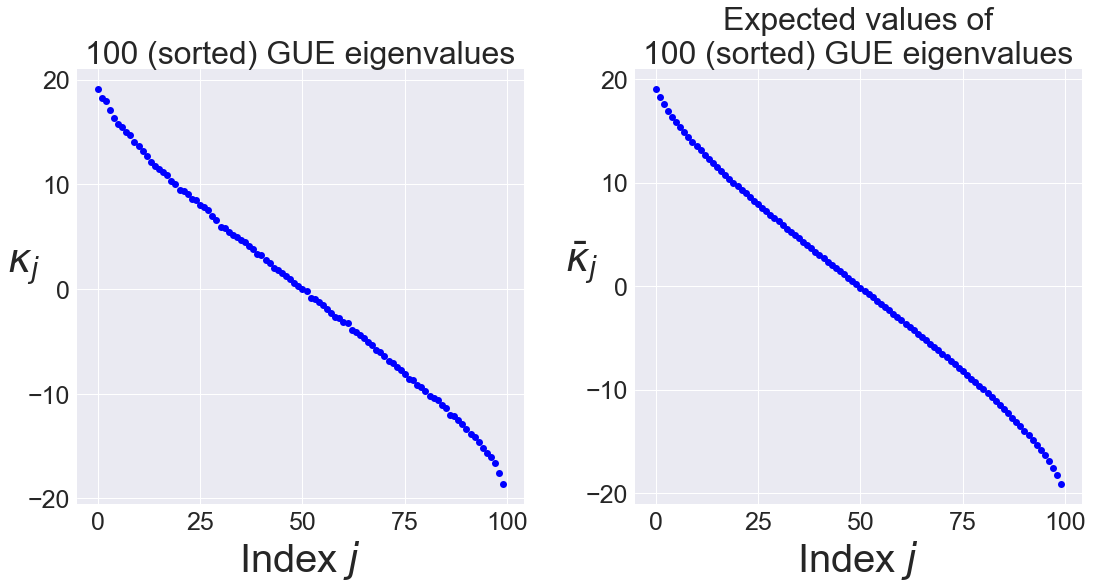

In [23]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 2, 1)
np.random.seed(0)
N = 100
ax.plot( GUEAll(N), 'bo', clip_on=False )
ax.set_title( "{0} (sorted) GUE eigenvalues".format(N), fontsize=32)
ax.set_xlabel(r'Index $j$', fontsize=40)
ax.set_ylabel(r'$\kappa_{j}$', rotation=0, fontsize=40)

ax = fig.add_subplot(1, 2, 2)
ax.plot( GUEAll(N,size=100), 'bo', clip_on=False )
ax.set_title( "Expected values of\n{0} (sorted) GUE eigenvalues".format(N), fontsize=32)
ax.set_xlabel(r'Index $j$', fontsize=40)
ax.set_ylabel(r'$\bar{\kappa}_{j}$', rotation=0, fontsize=40)

fig.subplots_adjust(wspace=.25)

if save: fig.savefig('Images/Figure_7.pdf', format='pdf', bbox_inches='tight')
        
plt.show()

Figure 8
=========

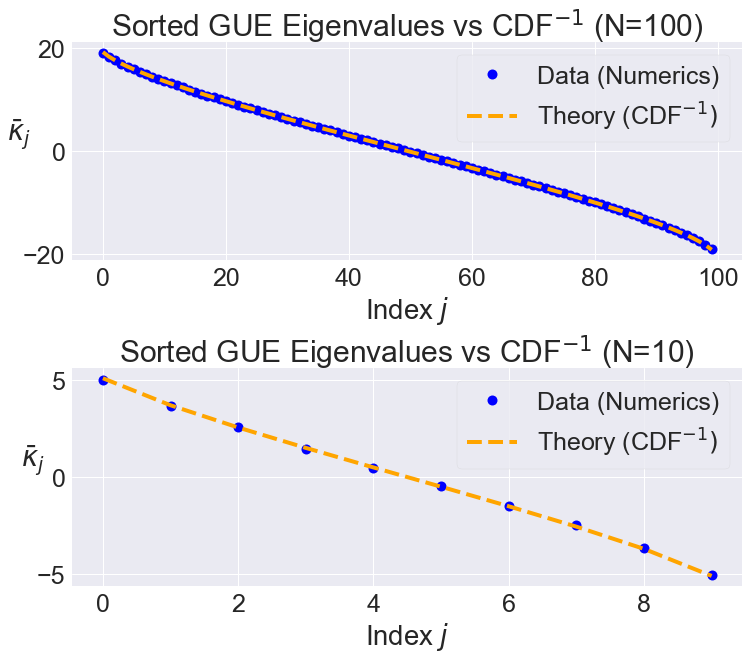

In [25]:
def GUE( n ):
    return st.semicircular(0,2*np.sqrt(n))

def UniformIntervalPoints( N ):
    dx = 1.0/N
    return np.array([(x*dx + dx/2.0) for x in xrange(N)])

def QuantumTypicalSample( N ):
    return GUE(N).ppf( UniformIntervalPoints(N)[::-1] )


fig = plt.figure(figsize=(12, 10))

counter = 1

for N in [100, 10]:
    Data = GUEAll( N, 100)
    Th = QuantumTypicalSample( N )
    ax = fig.add_subplot(2, 1, counter)


    ax.plot( Data, color='blue', marker='o', markersize=10, ls='', label="Data (Numerics)", clip_on=False )
    ax.plot( Th, color='orange', ls='--', lw=4, label=r"Theory (CDF$^{-1})$" , clip_on=False)
    ax.set_xlabel( r"Index $j$ ")
    ax.set_ylabel( r"$\bar{\kappa}_{j}$", rotation=0)
    ax.set_title( r"Sorted GUE Eigenvalues vs CDF$^{-1}$ (N="+'{0}'.format(N)+')')
    ax.legend( loc=1, fancybox=True, frameon=True )
    counter +=1

fig.subplots_adjust(hspace=.5)


if save: fig.savefig('Images/Figure_8.pdf', format='pdf', bbox_inches='tight')
        
plt.show()

Figure 9
============

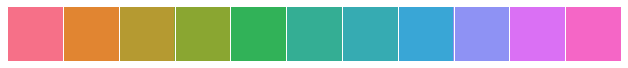

In [26]:
df = pd.read_csv('Data/iso_quantum_llrs_sim_totals.csv')
df1 = pd.read_csv('Data/iso_quantum_models.csv')
df = df.merge(df1, on=['dimRec', 'rankTrue'], how='inner')
df = df[df['dimRec'] <= 30]
ranks = df['rankTrue'].unique()

try:
    colors = sns.color_palette('husl', n_colors=len(ranks) + 1)
    sns.palplot(colors)
except Exception:
    colors = cm.viridis(np.linspace(0, 1, len(ranks) + 1))

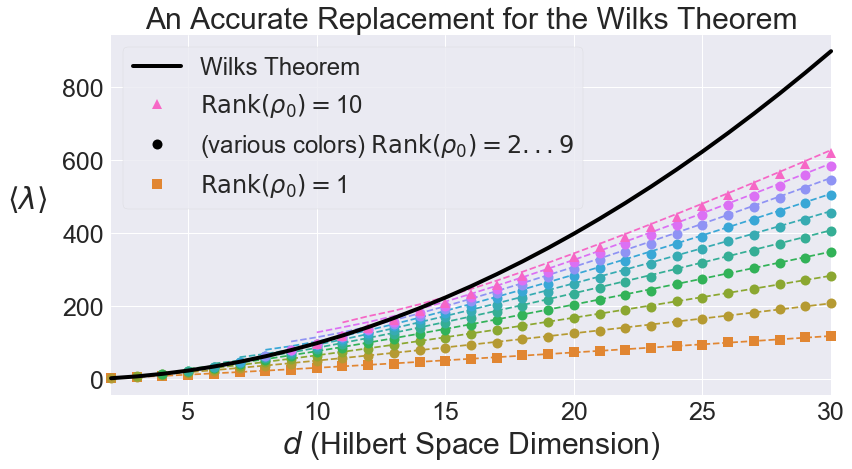

In [27]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
counter  = 1

for r in ranks:
    X = df[df['rankTrue'] == r]['dimRec'].values
    Y = df[df['rankTrue'] == r]['llrs'].values
    Z = df[df['rankTrue'] == r]['Our_Model'].values
    if r in [min(ranks), max(ranks)]:
        label = r'$\mathrm{Rank}(\rho_{0})=$'+ '{0}'.format(r)
    else:
        label = ''
    
    if r == min(ranks):
        marker = 's'
    elif r == max(ranks):
        marker = '^'
    else:
        marker = 'o'
    ax.plot(X, Y, clip_on=False, ls='', color=colors[counter],\
            marker=marker, markersize=10, label=label , alpha=1)
    
    ax.plot(X, Z, clip_on=False, ls='--', color=colors[counter],\
            marker='', alpha=1)
    counter += 1
    
X = df[df['rankTrue'] == 1]['dimRec'].values
Y = df[df['rankTrue'] == 1]['Wilks_Theorem'].values

ax.plot(X, Y, ls='-', marker='', lw=4, clip_on=False,\
        color='black', label='Wilks Theorem')

temp = ax.plot([], [], ls='', color='black', marker='o',
                          markersize=10, label=r'(various colors) $\mathrm{Rank}(\rho_{0}) = 2...9$')

handles, labels = ax.get_legend_handles_labels()
ix = [2, 1, 3, 0]
handles = list(np.array(handles)[ix])
labels = list(np.array(labels)[ix])

ax.legend(loc=0, fontsize=24, frameon=True, fancybox=True, handles=handles, labels=labels)

ax.set_xlabel(r'$d$ (Hilbert Space Dimension)', fontsize=30)
ax.set_ylabel(r'$\langle \lambda(\rho_{0}, \mathcal{M}_{d})\rangle$', fontsize=30, labelpad=10)
ax.set_title('An Accurate Replacement for the Wilks Theorem', fontsize=30)
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=25)
ax.set_xlim([2, 30])
plt.show()

if save: fig.savefig('Images/Figure_9.pdf', format='pdf', bbox_inches='tight')

Figure 10
===========

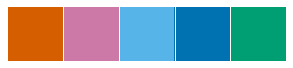

In [28]:
df = pd.read_csv('Data/heterodyne_condition_num.csv')
stateIDs = ['d2s0', 'd2s1', 'd2s2', 'd2s3']
try:
    colors = sns.color_palette('colorblind', n_colors=len(stateIDs) + 2)
    colors = [colors[2], colors[3], colors[5], colors[0], colors[1]]
except Exception:
    colors = cm.viridis(np.linspace(0, 1, len(stateIDs) + 2))
    
sns.palplot(colors)

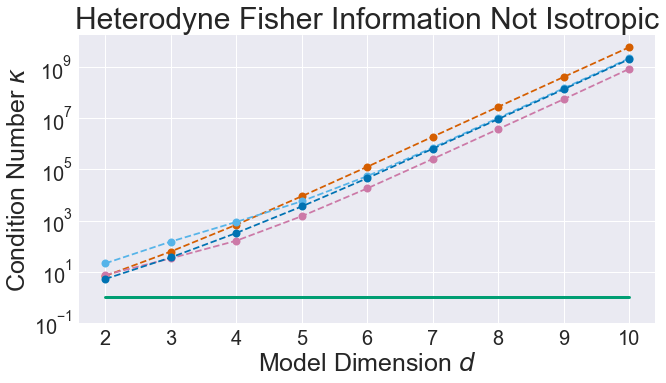

In [29]:
fig = plt.figure(figsize= (8, 4))
ax = fig.add_axes([0, 0, 1, 1])
dimRecs = range(2, 11)

counter = 0
for stateID in stateIDs:
    dimRecs = df[df['stateID'] == stateID]['dimRec'].values
    conditionNums = df[df['stateID'] == stateID]['conditionNum'].values

    ax.plot(dimRecs, conditionNums, ls='--', marker='o', markersize=8,\
            clip_on=False, color=colors[counter])
    
    counter +=1

ax.plot(dimRecs, np.ones_like(dimRecs), ls='-', lw=3, marker='', color=colors[counter], clip_on=False)
ax.set_yscale('log')
ax.set_xlabel(r'Model Dimension $d$', fontsize=25)
ax.set_ylabel(r'Condition Number $\kappa$', fontsize=25)
ax.set_title('Heterodyne Fisher Information Not Isotropic', fontsize=30)
ax.set_ylim([.1, max(ax.get_ylim())])
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=20)
plt.show()
if save: fig.savefig('Images/Figure_10.pdf', format='pdf', bbox_inches='tight')

Figure 11
============

In [30]:
df = pd.read_csv('Data/heterodyne_llrs_sim_results.csv')
temp = pd.DataFrame()

for stateID in df['stateID'].unique():
    S = max(df[df['stateID'] == stateID]['Sample'].unique())
    temp = temp.append(df[(df['stateID'] == stateID) & (df['Sample'] == S)], ignore_index=True)

temp['llrs'] = -2 *(temp['LogLik_true'] - temp['LogLik'])
temp = temp[temp['llrs'] <= 30]
temp = temp.drop(['stateID', 'Sample', 'numTrials', 'LogLik', 'LogLik_true'], axis=1)
df1 = pd.read_csv('Data/iso_quantum_models.csv')

df = temp.merge(df1, on=['dimRec', 'rankTrue'], how='inner') #.dropna()[['llrs', 'Wilks_Theorem', 'Our_Model']]


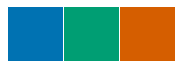

In [31]:
try:
    colors = sns.color_palette('colorblind', n_colors=3)
    sns.palplot(colors)
except Exception:
    colors = cm.PuOr(np.linspace(0, 1, 10))

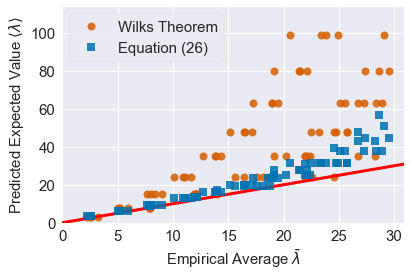

In [32]:
fig = plt.figure(figsize=(4.75, 3))
ax = fig.add_axes([0, 0, 1, 1])

x = df['llrs'].values
y = df['Wilks_Theorem'].values
    
ax.plot(x, y, ls='', marker='o', color=colors[2], clip_on=False, markersize=8, label='Wilks Theorem', alpha=.85)


my = max(ax.get_ylim())
ax.set_ylim([0, my])

mx = max(ax.get_xlim())
ax.set_xlim([0, mx])
ax.plot([0, my], [0, my], ls='-', color='red', lw=3)

x = df['llrs'].values
y = df['Our_Model'].values
    
ax.plot(x, y, ls='', marker='s', color=colors[0], clip_on=False, markersize=8, label='Equation (26)', alpha=.85)

my = max(ax.get_ylim())
ax.set_ylim([0, my])

mx = max(ax.get_xlim())
ax.set_xlim([0, mx])


ax.set_xlabel(r'Empirical Average $\bar{\lambda}$', fontsize=15)
ax.set_ylabel(r'Predicted Expected Value $\langle \lambda \rangle$', fontsize=15)
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=15)

ax.set_ylim([0, max(ax.get_ylim()) + 10])
ax.legend(loc=0, frameon=True, fontsize=15)
plt.show()
if save: fig.savefig('Images/Figure_11.pdf', format='pdf', bbox_inches='tight')

Figure 12
============

In [10]:
dataD = pd.read_csv('Data/heterodyne_llrs_sim_results.csv')
dataD['llrs'] = -2 * (dataD['LogLik_true'] - dataD['LogLik'])
dataD = dataD.drop(['LogLik', 'LogLik_true', 'numTrials'], axis=1)
temp = pd.read_csv('Data/iso_quantum_models.csv')
temp = temp[['dimRec', 'rankTrue', 'Our_Model']]
dataD = dataD.merge(temp, on=['dimRec', 'rankTrue'])

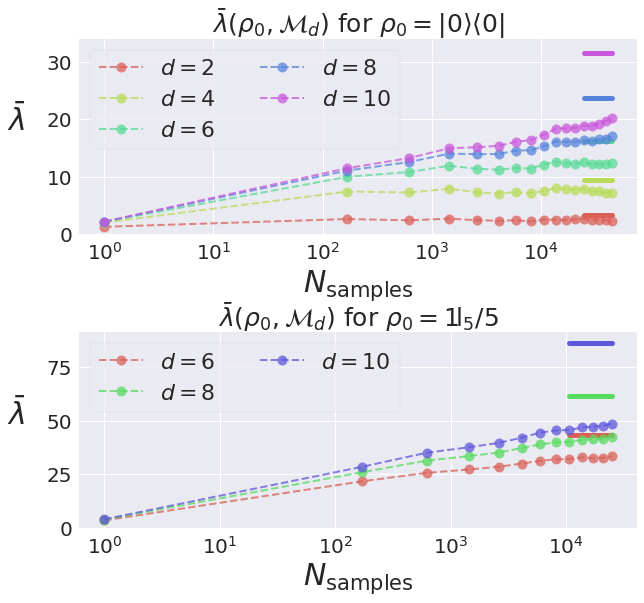

In [13]:
fig = plt.figure(figsize=(10, 9))
counter = 1
for stateID in ['d2s0', 'd5s0']:
    df = dataD[dataD['stateID'] == stateID]
    
    Samples = df['Sample'].unique()
    Samples = np.sort(Samples[::15])
    df = df[df['Sample'].isin(Samples)]
    df = df.dropna()
    dimRecs = np.sort(df['dimRec'].unique())
    dimRecs = dimRecs[::2]
    df = df[df['dimRec'].isin(dimRecs)]

    try:
        colors = sns.color_palette('hls', n_colors=len(dimRecs))
    except Exception:
        colors = cm.viridis(np.linspace(0, 1, len(dimRecs)))
    
    ax = fig.add_subplot(2, 1 ,counter)
    
    for dimRec in dimRecs:
        color= colors[np.where(dimRecs == dimRec)[0][0]]
        llrs = df[df['dimRec'] == dimRec]['llrs'].values
        ax.plot(Samples, llrs, ls='--', marker='o', clip_on=False, label=r'$d={0}$'.format(int(dimRec)),\
               color=color, markersize=10, alpha=.75, lw=2)
        our_value = float(df[df['dimRec'] == dimRec]['Our_Model'].unique())
        s = Samples[-5:]
        ax.plot(s, our_value * np.ones_like(s), ls='-', marker='', clip_on=False,\
               color=color, lw=5)

    ax.legend(loc=0, fontsize=22, ncol=2, frameon=True)
    ax.set_xscale('log')
    ax.set_ylim([0, max(ax.get_ylim()) + 1])
    ax.set_xlabel(r'$N_{\mathrm{samples}}$', fontsize=30)
    ax.set_ylabel(r'$\bar{\lambda}$', fontsize=30, rotation=0, labelpad=30)
    ax.set_title(r'$\bar{2}$ for $\rho_{0} = {1}$'.format(0, idDict[stateID],\
                                                                      r'\lambda(\rho_{0}, \mathcal{M}_{d})'),\
                 fontsize=25)

    for s in ['x', 'y']:
        ax.tick_params(axis=s, labelsize=20)
    counter += 1
    
fig.subplots_adjust(hspace=.5)
plt.show()
if save: fig.savefig('Images/Figure_12.pdf', format='pdf', bbox_inches='tight')

Figure 13
============

In [35]:
def matrix_rep(stateID, df):
    M = df[df['stateID'] == stateID].values[0][1:]
    M = [np.abs(np.complex(x)) for x in M]
    M = np.matrix(M).reshape((5, 5))
    N = np.zeros_like(np.eye(8))
    for j in xrange(len(M)):
        for k in xrange(len(M)):
            N[j, k] = M[j,k]
        
    return N

def llrs_contribs(stateID, df):
    M = np.matrix(df[df['stateID'] == stateID].values[0][2:], dtype=float)
    M = np.round(M.reshape((8, 8)), 2)
    
    return M

In [36]:
stateIDs = ['d2s0', 'd2s3']

df = pd.read_csv('Data/states.csv')
M0list = map(lambda s: matrix_rep(s, df), stateIDs)

df1 = pd.read_csv('Data/iso_quantum_llrs_sim_contribs.csv')
df1 = df1[df1['stateID'].isin(stateIDs)]
df1 = df1[df1['numTrials'] == 10 ** 4]

isoContribsList = map(lambda s: llrs_contribs(s, df1), stateIDs)

df2 = pd.read_csv('Data/heterodyne_llrs_sim_contribs.csv')
df2 = df2.drop(['sampleSize'], axis=1)
heteroContribsList = map(lambda s: llrs_contribs(s, df2), stateIDs)

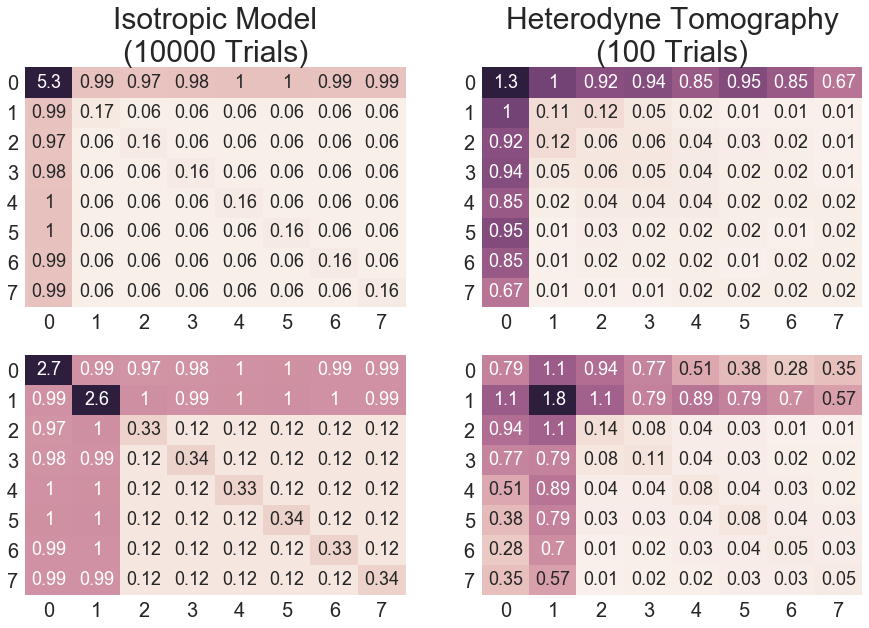

In [37]:
fig = plt.figure(figsize=(15, 15))

counter = 1
for j in xrange(len(isoContribsList)):
    ax1 = fig.add_subplot(3, 2, counter)

    try:
        sns.heatmap(isoContribsList[j], ax=ax1, annot=True, vmin=0, cbar=False, annot_kws={'fontsize': 18})
    except Exception:
        ax1.pcolor(np.flipud(np.array(isoContribsList[j])), cmap=cm.Blues)
    if j == 0:
        title = 'Isotropic Model\n({0} Trials)'.format(df1['numTrials'].unique()[0])
        ax1.set_title(title, fontsize=30)
    

    ax2 = fig.add_subplot(3, 2, counter + 1)
    try:
        sns.heatmap(heteroContribsList[j], ax=ax2, annot=True, cbar=False, vmin=0, annot_kws={'fontsize': 18})
    except Exception:
        ax2.pcolor(np.flipud(np.array(heteroContribsList[j])), cmap=cm.Blues)    
    
    if j == 0:
        title = 'Heterodyne Tomography\n({0} Trials)'.format(df2['numTrials'].unique()[0])

        ax2.set_title(title, fontsize=30)
    counter +=2
    
    for a in [ax1, ax2]:
        a.set_yticklabels(a.yaxis.get_majorticklabels(), rotation=0)
        for s in ['x', 'y']:
            a.tick_params(axis=s, labelsize=20)
plt.show()
if save: fig.savefig('Images/Figure_13.pdf', format='pdf', bbox_inches='tight')

Figure 14
============

At this time, this figure cannot be reproduced from within this notebook.